# Algoritmos Genéticos con Python

Librería **PyGAD** en Python para construir algoritmos genéticos.

https://github.com/ahmedfgad/GeneticAlgorithmPython

https://pygad.readthedocs.io/en/latest/index.html

## Esquema básico

Básicamente tenemos que:
- definir la función de fitness
- crear una instancia del algoritmo con los parámetros adecuados
- ejecutar el algoritmo
- tratar los resultados

In [2]:
# Definimos la función de fitnet que tendrá 3 parámetros
# ga_instance - instancia del algoritmo
# solution - individuo (cromosoma)
# solution_idx - xxxx
def fitness_func(ga_instance, solution, solution_idx):
    output = numpy.sum(solution*function_inputs)
    fitness = 1.0 / (numpy.abs(output - desired_output) + 0.000001)
    return fitness

# Creamos una instancia del algoritmo
# Le pasamos diferentes parámetros para configurar el algoritmo
ga_instance = pygad.GA(num_generations=num_generations, # Número de generaciones
                       num_parents_mating=num_parents_mating, # Número de padres para la siguiente generación
                       sol_per_pop=sol_per_pop, # Númnero de individuos en la población
                       num_genes=num_genes, # Número de genes en el individuo/cromosoma
                       fitness_func=fitness_func) # Función fitness a usar

# Ejecutamos el algoritmo
ga_instance.run()

# Trabajamos con los resultado
# Pintamos la evolución de la función fitness
ga_instance.plot_fitness()

# Nos quedamos con la mejor solución
solution, solution_fitness, solution_idx = ga_instance.best_solution(ga_instance.last_generation_fitness)


NameError: name 'pygad' is not defined

## Optimización de Funciones

Suponer que tenemos la función 
$f(w_1,w_2,w_3,w_4,w_5,w_6)=3w_1-1w_2+5w_3+5.2w_4-2w_5-4.3w_6$

y queremos aproximar $f(W)$ donde $W=(w_1,w_2,w_3,w_4,w_5,w_6)$, al valor $23$.
Es decir, queremos encontrar los valores de los $w_i$ con $i = \{1,2,3,4,5,6\}$ que consiguen aproximar mejor al valor de $23$

Como el algoritmo lo que hace es **maximizar** la función de **fitness**, y en nuestro caso queremos conseguir que la función se aproxime al valor 23, eso significa que tiene que estar muy cerca de $0$ la diferencia entre lo que obtengamos y $23$.
De forma que la función fitness será:
$$fitness = \frac{1}{f(W)-23+0.000001}$$
Se le añade el valor de $0.000001$ para que no se llegue a hacer 0 el denominador.
Esta función será mayor cuanto más cerca estemos de aproximar al valor que queremos.$$

Generacion = 1
Fitness    = 7.00787077627462
Cambio en el fitness     = 7.00787077627462
Mejor Solución = [ 1.83421688  1.56658849  2.25466898 -1.04167089  0.62619356 -3.3295286 ]
Generacion = 2
Fitness    = 7.00787077627462
Cambio en el fitness     = 0.0
Mejor Solución = [ 1.83421688  1.56658849  2.25466898 -1.04167089  0.62619356 -3.3295286 ]
Generacion = 3
Fitness    = 7.00787077627462
Cambio en el fitness     = 0.0
Mejor Solución = [ 1.83421688  1.56658849  2.25466898 -1.04167089  0.62619356 -3.3295286 ]
Generacion = 4
Fitness    = 206.2065824908816
Cambio en el fitness     = 199.198711714607
Mejor Solución = [1.3857752  1.54731285 2.64619695 4.00779542 0.53644387 2.93111569]
Generacion = 5
Fitness    = 206.2065824908816
Cambio en el fitness     = 0.0
Mejor Solución = [1.3857752  1.54731285 2.64619695 4.00779542 0.53644387 2.93111569]
Generacion = 6
Fitness    = 206.2065824908816
Cambio en el fitness     = 0.0
Mejor Solución = [1.3857752  1.54731285 2.64619695 4.00779542 0.53644387

C:\Users\acca3\miniconda3\envs\mineriadatos2\Lib\site-packages\pygad\pygad.py:728: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(
C:\Users\acca3\miniconda3\envs\mineriadatos2\Lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")
C:\Users\acca3\miniconda3\envs\mineriadatos2\Lib\site-packages\pygad\visualize\plot.py:109: UserWarn

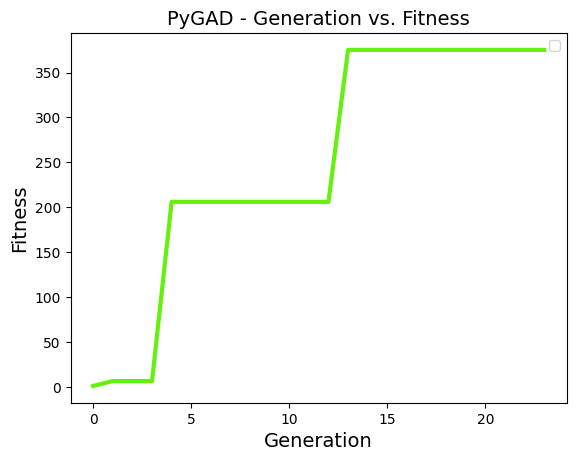

Parameters of the best solution : [1.3857752  1.5494966  2.64619695 4.00779542 0.53644387 2.93111569]
Fitness value of the best solution = 375.1282933953673
Index of the best solution : 0
Valor de la función basado en la mejor solución : 23.002664754670086
Mejor valor de fitness alcanzado después de 13 generaciones.


In [10]:
import pygad
import numpy

"""
Dada la siguiente funcion:
    y = f(w1,w2,w3,w4,w5,w6) = 3w1 - 1w2 + 5w3 + 5.2w4 - 2w5 -4.3w6
    y=23
Calcular los pesos wi para aproximar a 23 la función
"""

# Coeficientes de la función
function_inputs = [3,-1,5,5.2,-2,-4.3] 

# Valor al que se quiere aproximar la función
desired_output = 23 # Function output.

# Definimos la función de fitness
# Para cada solución construimos su valor
def fitness_func(ga_instance, solution, solution_idx):
    output = numpy.sum(solution*function_inputs)
    fitness = 1.0 / (numpy.abs(output - desired_output) + 0.000001)
    return fitness

num_generations = 100 # Numero de generaciones (iteraciones)
num_parents_mating = 5 # Numero de padres para la recombinación

sol_per_pop = 20 # Número de individuos en la población
num_genes = len(function_inputs) # Tenemos 6 genes que son cada uno de los wi


last_fitness = 0

# Esta función la usamos para sacar información en cada iteración
def on_generation(ga_instance):
    global last_fitness
    print(f"Generacion = {ga_instance.generations_completed}")
    print(f"Fitness    = {ga_instance.best_solution(pop_fitness=ga_instance.last_generation_fitness)[1]}")
    print(f"Cambio en el fitness     = {ga_instance.best_solution(pop_fitness=ga_instance.last_generation_fitness)[1] - last_fitness}")
    last_fitness = ga_instance.best_solution(pop_fitness=ga_instance.last_generation_fitness)[1]
    solution, solution_fitness, solution_idx = ga_instance.best_solution()
    print(f"Mejor Solución = {solution}")

# Construimos la instancia del objeto del algoritmo
ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       fitness_func=fitness_func,
                       on_generation=on_generation,
                       stop_criteria=["saturate_10"]) # aplicamos un criterio de parada con 10 iteraciones sin cambios

# Ejecutamos el algoritmo
ga_instance.run()

# Pintamos la evolución del fitness
ga_instance.plot_fitness()

# Obtenemos los valores de la mejor solución
solution, solution_fitness, solution_idx = ga_instance.best_solution(ga_instance.last_generation_fitness)
print(f"Parameters of the best solution : {solution}")
print(f"Fitness value of the best solution = {solution_fitness}")
print(f"Index of the best solution : {solution_idx}")

prediction = numpy.sum(numpy.array(function_inputs)*solution)
print(f"Valor de la función basado en la mejor solución : {prediction}")

if ga_instance.best_solution_generation != -1:
    print(f"Mejor valor de fitness alcanzado después de {ga_instance.best_solution_generation} generaciones.")



## Selección de Variables

Vamos a utilizar un **algoritmo genético** para hacer una selección de variables en un problema de clasificación binaria.
En este caso vamos a usar el dataset **Breast cancer** que nos da **426 muestras**, con **30 variables explicativas** sobre datos relacionados con el cáncer de mama.

El objetivo es ver cómo podemos hacer una **reducción de dimensiones**, quedándonos sólo con una parte de las variables explicativas.

En este caso tendremos que el **individuo/cromosoma** está compuesto por **30 genes** que corresponden a las 30 posibles variables. Usaremos una **codificación binaria** de forma que tendremos un **valor 1** si esa **variable se usa** y un **valor 0** si **no se usa**.

La función fitness se encarga de coger el individuo y usar todas aquellas variables que tengan valor 1, construir un modelo de regresión logística y usar el accuracy como su valor.
De esta forma cuanto mayor sea el fitness mejor será el modelo.

Haremos un pequeño control definiendo un **número máximo de variables** que queremos que tenga nuestra solución y que si no se llega el fitness será un valor negativo
Ejecutaremos el algoritmos y nos quedaremos con la **mejor solución**


In [11]:
import pygad
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression


from sklearn.datasets import load_breast_cancer
from sklearn.metrics import roc_auc_score

from numpy.random import RandomState
seed = 1234
state = RandomState(seed)

# Cargamos el dataset
bc = load_breast_cancer()

# Construimos el modelo del Clasificador de Regresión Logística
clf = LogisticRegression(C=1.0, solver='lbfgs', multi_class='ovr',max_iter=4500)


# Obtenemos los nombres de las variables
function_inputs = bc.feature_names


X, y = bc.data,bc.target
# Creamos un dataframe con los datos
X = pd.DataFrame(X, columns=bc.feature_names)
# Hacemos el split de datos de entranmiento y test
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=seed)
print(X_train.shape)


(426, 30)


In [12]:

# Definimos la función fitness
def fitness_func(ga_instance, solution, solution_idx):
    # Controlamos que el número de variables no supere el máximo puesto
    if( sum(solution) > num_max_variables ):
        #print("-----------------------------")
        #print(solution)
        #print("-----------------------------")
        print("Solución con muchas variables")
        fitness = -1000
    else:
        #print("-----------------------------")
        #print(solution)
        #print("-----------------------------")
        # Construimos una máscara booleana con las variables a usar
        mask = np.array(solution, dtype = bool)
        # Obtenemos la variables que se van a usar con este indiviudo
        selected_features = np.array(bc.feature_names)[mask]
        # Obtenemos los datos sólo con esas variables
        X_tmp = X_train.loc[:,selected_features]
        # Entrenamos el modelo con estos datos
        clf.fit(X_tmp, y_train)
        # Obtenemos el score (accuracy)
        score = clf.score(X_tmp, y_train)
        # Devuelve el score como el valor del fitness
        fitness = score
    return fitness


Numero de variables:
30
Solución con muchas variables
Solución con muchas variables
Solución con muchas variables


C:\Users\acca3\miniconda3\envs\mineriadatos2\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\acca3\miniconda3\envs\mineriadatos2\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Solución con muchas variables
Solución con muchas variables
Solución con muchas variables
Solución con muchas variables
Solución con muchas variables
Solución con muchas variables
Solución con muchas variables
Solución con muchas variables


C:\Users\acca3\miniconda3\envs\mineriadatos2\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\acca3\miniconda3\envs\mineriadatos2\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\acca3\miniconda3\envs\mineriadatos2\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\acca3\miniconda3\envs\mineriadatos2\Lib\

Solución con muchas variables
Solución con muchas variables


C:\Users\acca3\miniconda3\envs\mineriadatos2\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\acca3\miniconda3\envs\mineriadatos2\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\acca3\miniconda3\envs\mineriadatos2\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\acca3\miniconda3\envs\mineriadatos2\Lib\

Solución con muchas variables


C:\Users\acca3\miniconda3\envs\mineriadatos2\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\acca3\miniconda3\envs\mineriadatos2\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\acca3\miniconda3\envs\mineriadatos2\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\acca3\miniconda3\envs\mineriadatos2\Lib\

Solución con muchas variables


C:\Users\acca3\miniconda3\envs\mineriadatos2\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\acca3\miniconda3\envs\mineriadatos2\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\acca3\miniconda3\envs\mineriadatos2\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\acca3\miniconda3\envs\mineriadatos2\Lib\

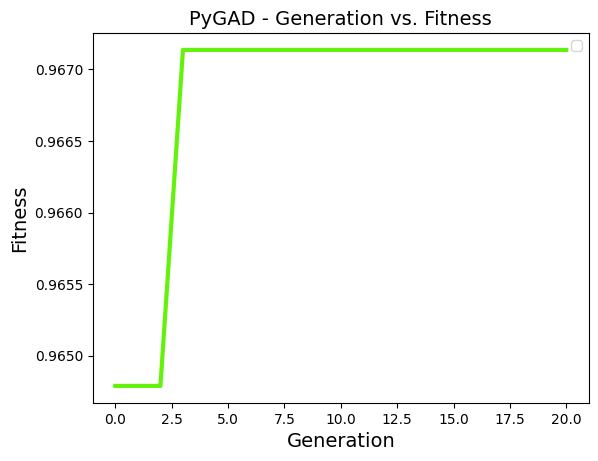

C:\Users\acca3\miniconda3\envs\mineriadatos2\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\acca3\miniconda3\envs\mineriadatos2\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\acca3\miniconda3\envs\mineriadatos2\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\acca3\miniconda3\envs\mineriadatos2\Lib\

Parámetros de la mejor solcuión : [1 1 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 1 0]
Valor de fitness de la mejor solución = 0.9671361502347418
Number of features selected = 12
[1 1 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 1 0]
Score de entrenamiento con todas las variables:
0.9647887323943662
Score de test con todas las variables:
0.9440559440559441
(143, 30)


C:\Users\acca3\miniconda3\envs\mineriadatos2\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Score de entrenamiento con subconjunto de las variables:
0.9671361502347418
Score de test con subconjunto de las variables:
0.9440559440559441
(143, 12)
Población inicial
[[0 1 0 1 1 0 0 1 1 1 0 1 1 1 0 1 1 0 1 1 0 1 0 0 1 1 0 1 0 1]
 [1 0 1 0 1 1 0 1 0 1 0 0 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 1 1 1]
 [0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 1 0 0 0 1 1 1 1 0 1 1 1 0]
 [0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 0 1 0 1 0 0 0 1 1 0 0 0 1 1]
 [1 1 1 1 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 1 1 1 0 0 1 0 1 0]
 [1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 0 1 1 1]
 [1 0 1 1 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 1 1 1 1 1 1 1 0 0 0 0]
 [0 1 1 1 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0 1 1 0]
 [0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1]
 [0 1 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 0]
 [0 1 0 1 1 0 0 1 1 0 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 1 0 0 0]
 [0 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1 0 1 0 0 1 1 1 0 0 1 1 1 1 0]
 [1 0 0 0 1 1 0 1 1 0 1 1 0 0 0 0 1 1 1 0 0 0 1 1 0 1 0 1 1 1]
 [1 0 0 0 

In [13]:

# Número de variables (será el número de genes)
m = len(bc.feature_names)
print("Numero de variables:")
print(m)

# Asignamos la función fitness
fitness_function = fitness_func

# Número máximo de variables que queremos
num_max_variables = 15
# Número de generaciones
num_generations = 20
# Número de padres para la siguiente generación
num_parents_mating = 5
# Número de individuos en cada generación
sol_per_pop = 20
# Número de genes de cada indivudo (número de variables en este caso)
num_genes = m

# Construimos la instancia del algoritmo
ga_instance = pygad.GA(#gene_space=gene_space,
                       num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       suppress_warnings=True,
                       init_range_low=0, # Rango entre 0 y 1
                       init_range_high=2,
                       random_seed=seed,
                       gene_type = int # gene de tipo entero entre 0 y 1
                       )

# Ejecutamos la instancia del algoritmo
ga_instance.run()

# Pintamos la evolución del fitness
ga_instance.plot_fitness()

# Nos quedamos con la mejor solución
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parámetros de la mejor solcuión : {solution}".format(solution=solution))
print("Valor de fitness de la mejor solución = {solution_fitness}".format(solution_fitness=solution_fitness))
print(f"Number of features selected = {sum(solution)}")
print(solution)

mask = np.array(solution, dtype = bool)
selected_features = np.array(bc.feature_names)[mask]


modelo1 = clf.fit(X_train, y_train)
print(f"Score de entrenamiento con todas las variables:")
print(modelo1.score(X_train, y_train))
print(f"Score de test con todas las variables:")
print(modelo1.score(X_test, y_test))
print(X_test.shape)

X_train.loc[:,selected_features].shape
modelo2 = clf.fit(X_train.loc[:,selected_features], y_train)
print(f"Score de entrenamiento con subconjunto de las variables:")
print(modelo2.score(X_train.loc[:,selected_features], y_train))
print(f"Score de test con subconjunto de las variables:")
print(modelo2.score(X_test.loc[:,selected_features], y_test))
print(X_test.loc[:,selected_features].shape)

np.set_printoptions(threshold = np.inf)
print("Población inicial")
print(ga_instance.initial_population)
print("Población final")
np.set_printoptions(threshold = np.inf)
print(ga_instance.population)

In [ ]:
#--------------------------------